#SMDP

In [ ]:
import numpy as np

# Transition matrices
transition_matrices = np.array(
    [
        [
            [0.5, 0.5, 0],
            [0, 0, 1]
        ],  # State 1
        [
            [0.5, 0.5, 0],
            [0, 0, 1]
        ],  # State 2
        [
            [0.5, 0.5, 0],
            [0, 0, 1]
        ],  #state 3
    ]
)

# Mean waiting times
up_times = np.array([
    [
        [260, 12, 0],
        [0, 0, 240]
    ],  # State 1
    [
        [260, 12, 0],
        [0, 0, 240]
    ],  # State 2
    [
        [260, 12, 0],
        [0, 0, 240]
    ],  # State 3
])
# Gain rates
gain_per_day = np.array(
    [
      [
          [15, 15, 0,],
          [0, 0, 12,]
      ],  # State 1
      [
          [5, 0, 0,],
          [0, 0, 10,]
      ],  # State 2
      [
          [15, 5, 0,],
          [0, 0, 12,]
      ],  # State 3
    ]
)

# b matrices
immediate_gain = np.array(
    [
      [
          [-5000, -1000, 0,],
          [0, 0, -4000,]
      ],  # State 1
      [
          [-5000, -1000, 0,],
          [0, 0, -4000,]
      ],  # State 2
      [
          [-5000, -1000, 0,],
          [0, 0, -4500,]
      ],  # State 3
    ]
)
# Discount factor
gamma = 0.85

# Initial policy
d = np.array([0,1,1])

# Maximum number of iterations
m = 30

# Value function
v = np.zeros(len(transition_matrices))

# Debug flag
debug = True

def calculate_value_function(policy):
    for iteration in range(m):
        old_v = v.copy()
        for i in range(len(transition_matrices)):
            action_values = np.zeros(len(transition_matrices[i]))
            for k in range(len(transition_matrices[i])):
                for j in range(len(transition_matrices[i][k])):
                    action_values[k] += transition_matrices[i][k][j] * (gain_per_day[i][k][j] * hold_times[i][k][j] + immediate_gain[i][k][j] + gamma * old_v[j])
            v[i] = action_values[policy[i]]
        if np.max(np.abs(old_v - v)) < 1e-5:
            break
        if debug:
            print(f"Iteration {iteration}: Value function {v}")
    return v

def policy_improvement(policy):
    while True:
        old_policy = policy.copy()
        V = calculate_value_function(policy)
        for i in range(len(transition_matrices)):
            action_values = np.zeros(len(transition_matrices[i]))
            for k in range(len(transition_matrices[i])):
                for j in range(len(transition_matrices[i][k])):
                    action_values[k] += transition_matrices[i][k][j] * (gain_per_day[i][k][j] * hold_times[i][k][j] + immediate_gain[i][k][j] + gamma * V[j])
            policy[i] = np.argmax(action_values)
        if np.array_equal(old_policy, policy):
            break
        if debug:
            print("Policy update: ", policy)
    return policy

optimal_policy = policy_improvement(d)
print("Optimal policy:", optimal_policy)


Optimal policy: [1 0 1]
[array([990., 900., 930.]), array([1462.5, 1372.5, 1402.5]), array([1698.75, 1608.75, 1638.75]), array([1816.875, 1726.875, 1756.875]), array([1875.9375, 1785.9375, 1815.9375]), array([1905.46875, 1815.46875, 1845.46875]), array([1920.234375, 1830.234375, 1860.234375]), array([1927.6171875, 1837.6171875, 1867.6171875]), array([1931.30859375, 1841.30859375, 1871.30859375]), array([1933.15429688, 1843.15429688, 1873.15429688]), array([1934.07714844, 1844.07714844, 1874.07714844]), array([1934.53857422, 1844.53857422, 1874.53857422]), array([1934.76928711, 1844.76928711, 1874.76928711]), array([1934.88464355, 1844.88464355, 1874.88464355]), array([1934.94232178, 1844.94232178, 1874.94232178]), array([1934.97116089, 1844.97116089, 1874.97116089]), array([1934.98558044, 1844.98558044, 1874.98558044]), array([1934.99279022, 1844.99279022, 1874.99279022]), array([1934.99639511, 1844.99639511, 1874.99639511]), array([1934.99819756, 1844.99819756, 1874.99819756]), array(

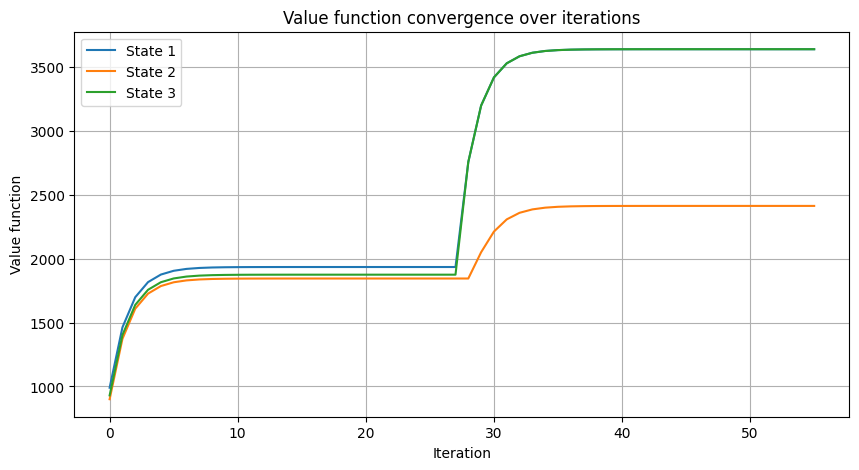

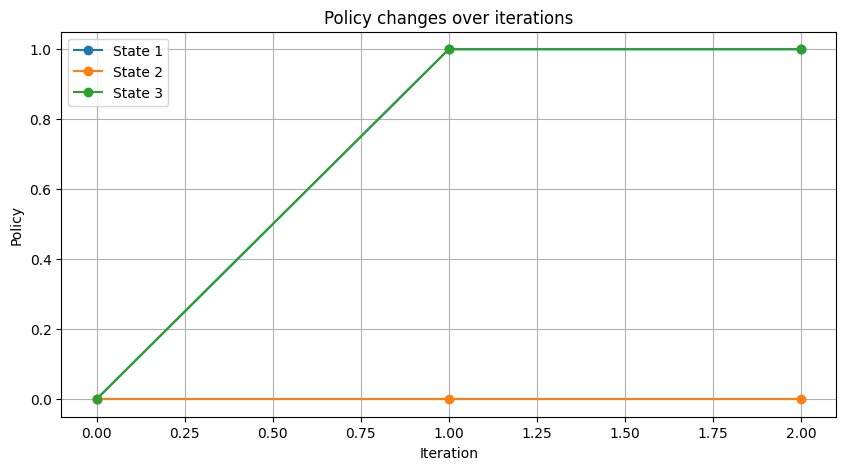

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrices
transition_matrices = np.array(
    [
        [
            [0.5, 0.5, 0],
            [0, 0, 1]
        ],  # State 1
        [
            [0.5, 0.5, 0],
            [0, 0, 1]
        ],  # State 2
        [
            [0.5, 0.5, 0],
            [0, 0, 1]
        ],  #state 3
    ]
)

# Mean waiting times
up_times = np.array([
    [
        [260, 12, 0],
        [0, 0, 240]
    ],  # State 1
    [
        [260, 12, 0],
        [0, 0, 240]
    ],  # State 2
    [
        [260, 12, 0],
        [0, 0, 240]
    ],  # State 3
])
# Gain rates
gain_per_day = np.array(
    [
      [
          [30, 15, 0],
          [0, 0, 28]
      ],  # State 1
      [
          [30, 0, 0],
          [0, 0, 17]
      ],  # State 2
      [
          [30, 5, 0],
          [0, 0, 28]
      ],  # State 3
    ]
)

# b matrices
immediate_gain = np.array(
    [
      [
          [-5000, -1000, 0,],
          [0, 0, -4900,]
      ],  # State 1
      [
          [-5000, -1000, 0,],
          [0, 0, -4900,]
      ],  # State 2
      [
          [-5000, -1000, 0,],
          [0, 0, -4900,]
      ],  # State 3
    ]
)
# Discount factor
gamma = 0.5

# Initial policy
d = np.array([0,0,0])

# Maximum number of iterations
m = 100

# Value function
v = np.zeros(len(transition_matrices))

# Debug flag
debug = False



def calculate_value_function(policy):
    # Storing history for plotting
    v_history = []
    for iteration in range(m):
        old_v = v.copy()
        for i in range(len(transition_matrices)):
            action_values = np.zeros(len(transition_matrices[i]))
            for k in range(len(transition_matrices[i])):
                for j in range(len(transition_matrices[i][k])):
                    action_values[k] += transition_matrices[i][k][j] * (gain_per_day[i][k][j] * up_times[i][k][j] + immediate_gain[i][k][j] + gamma * old_v[j])
            v[i] = action_values[policy[i]]
        v_history.append(v.copy())  # Store the values at this iteration for later plotting
        if np.max(np.abs(old_v - v)) < 1e-5:
            break
        if debug:
            print(f"Iteration {iteration}: Value function {v}")
    return v, v_history

def policy_improvement(policy):
    v_history = []  # For plotting
    policy_history = [policy.copy()]  # For plotting policy changes
    while True:
        old_policy = policy.copy()
        V, v_hist = calculate_value_function(policy)
        v_history.extend(v_hist)
        for i in range(len(transition_matrices)):
            action_values = np.zeros(len(transition_matrices[i]))
            for k in range(len(transition_matrices[i])):
                for j in range(len(transition_matrices[i][k])):
                    action_values[k] += transition_matrices[i][k][j] * (gain_per_day[i][k][j] * up_times[i][k][j] + immediate_gain[i][k][j] + gamma * V[j])
            policy[i] = np.argmax(action_values)
        policy_history.append(policy.copy())  # Store the policy at this iteration
        if np.array_equal(old_policy, policy):
            break
        if debug:
            print("Policy update: ", policy)
    return policy, v_history, policy_history

optimal_policy, v_history, policy_history = policy_improvement(d)
print("Optimal policy:", optimal_policy)


# Plotting the value function history
plt.figure(figsize=(10, 5))
print(v_history)
for idx, state in enumerate(zip(*v_history)):  # Transpose v_history to get state-wise progression
    plt.plot(state, label=f'State {idx+1}')
plt.title('Value function convergence over iterations')
plt.xlabel('Iteration')
plt.ylabel('Value function')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the policy changes
plt.figure(figsize=(10, 5))
for state_idx, state in enumerate(np.array(policy_history).T):  # Transpose to get state-wise progression
    plt.plot(state, '-o', label=f'State {state_idx+1}')
plt.title('Policy changes over iterations')
plt.xlabel('Iteration')
plt.ylabel('Policy')
plt.legend()
plt.grid(True)
plt.show()

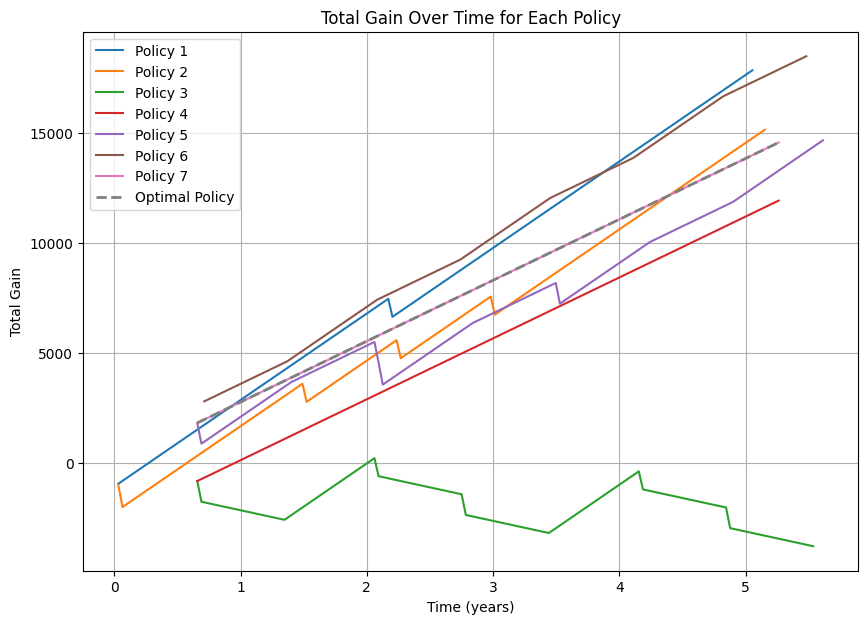

In [105]:
test_policies = [
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,1,0],
    [1,1,1],
]

def simulate(policy):
    # Initialize the system in the starting state
    state = np.random.choice(len(transition_matrices))

    # Initialize the total gain and a list to store the total gain at each time step
    total_gain = 0
    total_gain_list = []

    # Initialize the simulation time and a list to store the total time at each time step
    time = 0
    time_list = []

    # Run the simulation until a specified end time
    end_time = 365*5
    while time < end_time:
        # Choose an action based on the current state and the policy
        action = policy[state]

        # Determine the next state based on the chosen action and the transition probabilities
        next_state = np.random.choice(len(transition_matrices[state][action]), p=transition_matrices[state][action])

        # Update the total gain
        total_gain += immediate_gain[state][action][next_state] + gain_per_day[state][action][next_state] * up_times[state][action][next_state]
        total_gain_list.append(total_gain)

        # Update the simulation time
        time += hold_times[state][action][next_state]
        time_list.append(time)

        # Update the current state to the next state
        state = next_state

    # Return the list of total gain and total time at each time step
    return total_gain_list, time_list

# Run the simulation for each policy and plot the results
plt.figure(figsize=(10, 7))
for i, policy in enumerate(test_policies):
    total_gain_list, time_list = simulate(policy)
    plt.plot([t/365 for t in time_list], total_gain_list, label=f'Policy {i+1}')

# Run the simulation for the optimal policy and plot the results
total_gain_list, time_list = simulate(optimal_policy)
plt.plot([t/365 for t in time_list], total_gain_list, label='Optimal Policy', linewidth=2, linestyle='dashed')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Total Gain')
plt.title('Total Gain Over Time for Each Policy')
plt.grid(True)
plt.show()

[1 0 1]


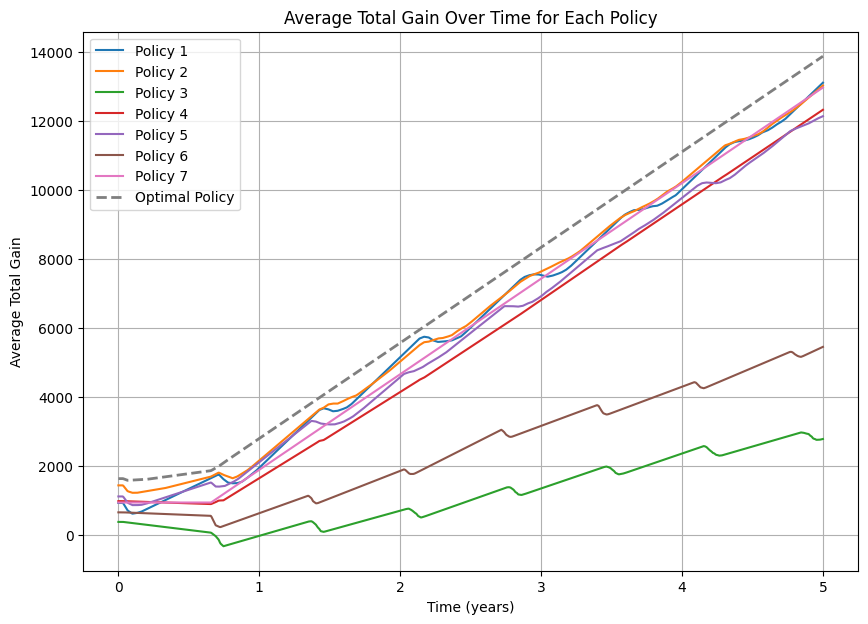

In [107]:
num_runs = 100  # the number of simulations to run for each policy
max_time = 365 * 5  # the maximum simulation time (should be the same as in simulate function)
num_time_steps = 1000  # the number of time steps in the grid

test_policies = [
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,1,0],
    [1,1,1],
]

print(optimal_policy)


def simulate_average(policy, num_runs):
    average_gain_list = np.zeros(num_time_steps)

    for _ in range(num_runs):
        total_gain_list, time_list = simulate(policy)

        # Define a regular time grid and interpolate the gains onto this grid
        regular_time_grid = np.linspace(0, max_time, num=num_time_steps)
        interpolated_gains = np.interp(regular_time_grid, time_list, total_gain_list)

        # Accumulate the interpolated gains
        average_gain_list += interpolated_gains

    # Average the accumulated gains
    average_gain_list /= num_runs

    return average_gain_list, regular_time_grid

# Run the simulation for each policy and plot the results
plt.figure(figsize=(10, 7))
for i, policy in enumerate(test_policies):
    average_gain_list, time_grid = simulate_average(policy, num_runs)
    plt.plot([t/365 for t in time_grid], average_gain_list, label=f'Policy {i+1}')

# Run the simulation for the optimal policy and plot the results
average_gain_list, time_grid = simulate_average(optimal_policy, num_runs)
plt.plot([t/365 for t in time_grid], average_gain_list, label='Optimal Policy', linewidth=2, linestyle='dashed')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Average Total Gain')
plt.title('Average Total Gain Over Time for Each Policy')
plt.grid(True)
plt.show()
